# Introduction

In this session, we will build on your knowledge from the previous class on data gathering and cleaning. Today, we will dive into exploratory data analysis (EDA) and its importance in the financial sector.
We will be using the LendingClub dataset and perform an exploratory data analysis to uncover actionable insights.


## Agenda:
1. Overview of exploratory data analysis
2. Summary statistics - Univariate analysis
3. Multivariate analysis
4. Enriching your data with feature engineering
5. Useful data visualisation techniques
6. Data standardisation & Normalisation
7. Pandas profiling: a great starting point for EDA
8. Assignment #1

Demo: Implementation in Python
------------------------------




### Set up

#### User-specified parameters

In [7]:
python_material_folder_name = "python-material"

#### Import libraries

In [10]:
import pandas as pd
import numpy as np

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# Check if in Google Colab environment
try:
    from google.colab import drive
    # Mount drive
    drive.mount('/content/drive')
    # Set up path to Python material parent folder
    path_python_material = rf"drive/MyDrive/{python_material_folder_name}"
        # If unsure, print current directory path by executing the following in a new cell:
        # !pwd
    IN_COLAB = True
except:
    IN_COLAB = False
    # If working locally on Jupyter Notebook, parent folder is one folder up (assuming you are using the folder structure shared at the beginning of the course)
    path_python_material = ".."


---

1\. Overview of data exploration
----------------------------------------
Once you have sourced the relevant data for your project, you need to become familiar with it to:
- Gain a better understanding of the data's structure and content.
- Discover patterns, trends, and relationships within the data.
- Extract actionable insights that can inform business decisions.  

In summary, this will help you assess how the data can be used to achieve your business objective.

---

2\. Summary statistics - Univariate analysis
----------------------------------------

Univariate analysis involves examining a single variable. Common techniques include calculating central tendency measures like mean, median, and mode.

- **Mean**: The average value
- **Median**: The middle value
- **Mode**: The most frequent value
- **Standard Deviation**: Measures the spread of the data
- **Percentiles**: Indicate the relative standing of a value in the dataset

### Why are they useful?
Summary statistics provide a quick overview of the data, allowing us to grasp the general trends and identify any anomalies or outliers.

### <span style="color:BLUE"> **>>> QUESTION:** </span>    
> *Where have we already encountered descriptive statistics and can you remember how to print some of them out for a pandas dataframe?*



### Data import

In [14]:
# Read data that was exported from previous session
df = pd.read_csv(f"{path_python_material}/data/2-intermediate/df_out_dsif2.csv")

df.head()

,Unnamed: 0.1,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_fico_range_low,sec_app_fico_range_high,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,debt_settlement_flag,hardship_status_filled,last_pymnt_amnt_log,last_pymnt_amnt_capped,emp_title_clean,emp_title_manager,Job Title,Category
0,1746494,167338079,4000.0,4000.0,4000.0,36 months,13.08%,134.93,B,B5,cashier,10+ years,MORTGAGE,48000.0,Source Verified,Mar-2020,Current,n,home_improvement,Home improvement,115xx,NY,20.25,1.0,Dec-2004,665.0,669.0,0.0,19.0,4.0,1.0,1988.0,82.8%,12.0,w,3816.34,3816.34,266.950000,266.95,183.66,83.29,0.0,0.0,0.0,May-2020,134.93,Jun-2020,May-2020,669.0,665.0,1.0,NaN,1.0,Individual,NaN,NaN,NaN,0.0,3832.0,259024.0,0.0,1.0,0.0,1.0,16.0,9960.0,56.0,0.0,0.0,0.0,59.0,2400.0,1.0,0.0,0.0,1.0,64756.0,NaN,NaN,0.0,0.0,179.0,75.0,38.0,16.0,2.0,NaN,19.0,16.0,19.0,1.0,0.0,2.0,0.0,1.0,5.0,2.0,5.0,2.0,4.0,0.0,0.0,0.0,0.0,75.0,NaN,1.0,0.0,395328.0,11948.0,0.0,17928.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NO_HARDSHIP,4.912140,134.93,cashier,False,NaN,NaN
1,2370717,71016917,24000.0,24000.0,24000.0,60 months,9.16%,500.07,B,B2,ABM,6 years,RENT,57000.0,Source Verified,Feb-2016,Current,n,credit_card,Credit card refinancing,708xx,LA,25.33,0.0,Jan-2004,680.0,684.0,0.0,NaN,10.0,0.0,22697.0,64.5%,24.0,w,4333.29,4333.29,25496.160000,25496.16,19666.71,5829.45,0.0,0.0,0.0,May-2020,500.07,Jun-2020,May-2020,704.0,700.0,0.0,NaN,1.0,Individual,NaN,NaN,NaN,0.0,0.0,61815.0,0.0,3.0,0.0,3.0,14.0,39118.0,72.0,1.0,1.0,2137.0,67.0,35200.0,0.0,7.0,0.0,4.0,6182.0,7741.0,40.5,0.0,0.0,145.0,137.0,7.0,7.0,0.0,7.0,NaN,24.0,NaN,0.0,3.0,5.0,5.0,6.0,15.0,7.0,9.0,5.0,10.0,0.0,0.0,0.0,1.0,95.8,60.0,0.0,0.0,88154.0,61815.0,13000.0,52954.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NO_HARDSHIP,6.216746,500.07,abm,False,NaN,NaN
2,2264870,39589826,5000.0,5000

### Summary Statistics

In [17]:
from scipy.stats import skew

# Calculating Summary Statistics
mean_loan = df['loan_amnt'].mean()
median_loan = df['loan_amnt'].median()
mode_loan = df['loan_amnt'].mode()[0]
std_loan = df['loan_amnt'].std()
percentiles_loan = df['loan_amnt'].quantile([0.25, 0.5, 0.75])
skewness_value = skew(df['loan_amnt'])

print(f"Mean Loan Amount: {mean_loan}")
print(f"Median Loan Amount: {median_loan}")
print(f"Mode Loan Amount: {mode_loan}")
print(f"Standard Deviation of Loan Amount: {std_loan}")
print(f"Loan Amount Percentiles: \n{percentiles_loan}")
print("Skewness:", skewness_value)

Mean Loan Amount: 15332.373
Median Loan Amount: 13000.0
Mode Loan Amount: 10000.0
Standard Deviation of Loan Amount: 9468.189883376823
Loan Amount Percentiles: 
0.25     8000.0
0.50    13000.0
0.75    20000.0
Name: loan_amnt, dtype: float64
Skewness: 0.7887250378394999


### <span style="color:BLUE"> **>>> EXERCISE:**</span>
> Create a function that takes as input a dataframe and a column name, and oututs the summary statistics as per the output created in the cell above (mean, median, mode, std deviation and 25th, 50th and 75th percentiles, skewness value.  

> Additionally, based on skewness value print the following:  
'Skewness = 0: Data is perfectly symmetric.'  
'Skewness > 0: Positive skew (right skew).'  
'Skewness < 0: Negative skew (left skew).'  

> Test the function on `loan_amnt` column first, then on `int_rate` column. What happens when you run it on `int_rate`, can you think of a way around it?   




In [30]:
# Step 1 - Create the function
def summary_statistics(df, column_name):
#    """
#    Takes as input a dataframe and a column name, and oututs the following summary statistics: mean, median, mode, std deviation and 25th, 50th and 75th percentiles, skewness value and assessment.
#    """
    mean_val = df[column_name].mean()
    median_val = df[column_name].median()
    mode_val = df[column_name].mode()[0]  # Mode returns a Series, take the first mode
    std_val = df[column_name].std()
    percentiles = df[column_name].quantile([0.25, 0.50, 0.75])
    skewness = df[column_name].skew()


# Step 2 - Test on loan_amnt
# YOUR CODE HERE

# Step 3 - Int_rate

# First, we strip out the '%' sign and cast as float
df['int_rate_clean'] = df['int_rate'].str.rstrip('%').astype('float') / 100.0

# Now we can test our function on 'int_rate' column
summary_statistics(df, "int_rate_clean")


In [34]:
# SOLUTION

# Step 1 - Create the function
def summary_statistics(df:pd.DataFrame, col_name:str):
    """
    Takes as input a dataframe and a column name, and oututs the following summary statistics: mean, median, mode, std deviation and 25th, 50th and 75th percentiles.
    """
    # Calculating Summary Statistics
    mean_loan = df[col_name].mean()
    median_loan = df[col_name].median()
    mode_loan = df[col_name].mode()[0]
    std_loan = df[col_name].std()
    percentiles_loan = df[col_name].quantile([0.25, 0.5, 0.75])
    skewness_value = skew(df[col_name])

    print(f"Mean Loan Amount: {mean_loan}")
    print(f"Median Loan Amount: {median_loan}")
    print(f"Mode Loan Amount: {mode_loan}")
    print(f"Standard Deviation of Loan Amount: {std_loan}")
    print(f"Loan Amount Percentiles: \n{percentiles_loan}")
    print("Skewness:", skewness_value)

    # Interpret the skewness
    if skewness_value == 0:
        print("Skewness = 0: Data is perfectly symmetric.")
    elif skewness_value > 0:
        print("Skewness > 0: Positive skew (right skew).")
    else:
        print("Skewness < 0: Negative skew (left skew).")

# Step 2 - loan_amnt
summary_statistics(df, "loan_amnt")

# Step 3 - Int_rate

# First, we strip out the '%' sign and cast as float
df['int_rate_clean'] = df['int_rate'].str.rstrip('%').astype('float') / 100.0

# Now we can test our function on 'int_rate' column
summary_statistics(df, "int_rate_clean")

Mean Loan Amount: 15332.373
Median Loan Amount: 13000.0
Mode Loan Amount: 10000.0
Standard Deviation of Loan Amount: 9468.189883376823
Loan Amount Percentiles: 
0.25     8000.0
0.50    13000.0
0.75    20000.0
Name: loan_amnt, dtype: float64
Skewness: 0.7887250378394999
Skewness > 0: Positive skew (right skew).
Mean Loan Amount: 0.13056737399999999
Median Loan Amount: 0.1249
Mode Loan Amount: 0.0819
Standard Deviation of Loan Amount: 0.04876960132176751
Loan Amount Percentiles: 
0.25    0.0917
0.50    0.1249
0.75    0.1601
Name: int_rate_clean, dtype: float64
Skewness: 0.7750035519672701
Skewness > 0: Positive skew (right skew).


Hint: to improve format and limit number of decimal characters, try adopting the following syntax instead:
`mean_loan = ("%.2f" % df[col_name].mean())`

3\. Multivariate Analysis
----------------------------------------

Multivariate analysis involves examining relationships between two or more variables. This can help identify correlations and interactions within the data.

### Correlation
Correlation is a way to measure how strongly two things are related to each other. It's like asking: "When one thing changes, does the other thing change too? And if it does, how much?"

**Note**: correlation tells us about the strength and direction of a relationship between two variables (X and Y), but it doesn't give us the exact amount by which Y changes when X changes.

In [38]:
# Correlation between Loan Amount and Interest Rate
correlation = df['loan_amnt'].corr(df['int_rate_clean'])
print(f"Correlation between Loan Amount and Interest Rate: {correlation}")


Correlation between Loan Amount and Interest Rate: 0.06635250967803737


### <span style="color:BLUE"> **>>> EXERCISE:**  </span>
> Find the correlation between `loan_amnt` and a new column called `term_numeric` which is a numeric equivalent of the `term` column.    


In [41]:
#df['term_numeric'] = # YOUR CODE HERE
#print(f"Correlation between Loan Amount and Interest Rate: {# YOUR CODE HERE}")


In [43]:
# SOLUTION
df['term_numeric'] = df['term'].str.strip(" months").astype("float") # Can become an exercise based on previous
correlation_term = df['loan_amnt'].corr(df['term_numeric'])
print(f"Correlation between loan amount and loan term: {correlation_term}")


Correlation between loan amount and loan term: 0.3905709541520238


### <span style="color:BLUE"> **>>> DISCUSSION:**  </span>
> What can we conclude?


4\. Enriching your data with feature engineering
-----------------------

### What is Feature Engineering?

Feature engineering is the process of using domain knowledge to create new features or modify existing ones to improve the performance of machine learning models.

### Why is it important?

Feature engineering can significantly enhance the predictive power of models by incorporating additional information or transforming existing data into more useful formats.

### Techniques

-   **Creating New Features**: e.g., debt-to-income ratio
-   **Transforming Existing Features**: e.g., log transformation
-   **Feature encoding**: e.g.: dummy encoding, label encoding

In [47]:
print(*df.columns, sep=("\n"))

Unnamed: 0.1
id
loan_amnt
funded_amnt
funded_amnt_inv
term
int_rate
installment
grade
sub_grade
emp_title
emp_length
home_ownership
annual_inc
verification_status
issue_d
loan_status
pymnt_plan
purpose
title
zip_code
addr_state
dti
delinq_2yrs
earliest_cr_line
fico_range_low
fico_range_high
inq_last_6mths
mths_since_last_delinq
open_acc
pub_rec
revol_bal
revol_util
total_acc
initial_list_status
out_prncp
out_prncp_inv
total_pymnt
total_pymnt_inv
total_rec_prncp
total_rec_int
total_rec_late_fee
recoveries
collection_recovery_fee
last_pymnt_d
last_pymnt_amnt
next_pymnt_d
last_credit_pull_d
last_fico_range_high
last_fico_range_low
collections_12_mths_ex_med
mths_since_last_major_derog
policy_code
application_type
annual_inc_joint
dti_joint
verification_status_joint
acc_now_delinq
tot_coll_amt
tot_cur_bal
open_acc_6m
open_act_il
open_il_12m
open_il_24m
mths_since_rcnt_il
total_bal_il
il_util
open_rv_12m
open_rv_24m
max_bal_bc
all_util
total_rev_hi_lim
inq_fi
total_cu_tl
inq_last_12m
acc_op

## Creating new features

In [50]:
# Creating a new feature: debt-to-income ratio
df['debt_to_income'] = df['loan_amnt'] / df['annual_inc']
df[['id','loan_amnt', 'annual_inc', 'debt_to_income']].head(5)


,id,loan_amnt,annual_inc,debt_to_income
0,167338079,4000.0,48000.0,0.083333
1,71016917,24000.0,57000.0,0.421053
2,39589826,5000.0,55000.0,0.090909
3,134798709,24000.0,43500.0,0.551724
4,127097355,14000.0,48000.0,0.291667


### <span style="color:BLUE"> **>>> EXERCISE:**  </span>
> Let's create a new feature called `interest_per_loan_amnt`, which calculates the total interest paid throughout the course of the term based on interest rate, loan amount and term information.   


For a loan, the borrower makes fixed monthly payments that cover both interest and principal repayment. The formula used is the standard annuity formula for loan payments.


Let’s apply this to an example and print out the monthly outstanding balances to verify the total interest calculation.

We will:
1. Calculate the monthly payment.
2. Compute total interest paid.
3. Generate a schedule of monthly balances to confirm the calculation.


In [55]:
# SOLUTION - Compound interest
# For a loan, the borrower makes fixed monthly payments that cover both interest and principal repayment.
# The formula used is the standard annuity formula for loan payments
# More information can be found here: https://learning.treasurers.org/resources/how-to-calculate-loan-instalments-with-annuity-factors

pd.options.display.float_format = '{:.2f}'.format

import numpy as np
import pandas as pd

# Loan details
loan_amt = df.iloc[0].loan_amnt
int_rate_clean = df.iloc[0].int_rate_clean
term_numeric =  df.iloc[0].term_numeric.astype("int")

# Convert annual interest rate to monthly interest rate (decimal)
monthly_rate = int_rate_clean / 12

# Compute Monthly Payment using annuity formula
monthly_payment = (loan_amt * monthly_rate) / (1 - np.power(1 + monthly_rate, -term_numeric))

# Compute Total Payment and Interest Paid
total_payment = monthly_payment * term_numeric
total_interest = total_payment - loan_amt

# Print calculated values
print(f"Monthly Payment: ${monthly_payment:.2f}")
print(f"Total Payment: ${total_payment:.2f}")
print(f"Total Interest Paid: ${total_interest:.2f}")

# Generate Amortization Schedule
remaining_balance = loan_amt
schedule = []

for month in range(1, term_numeric + 1):
    interest_payment = remaining_balance * monthly_rate # Interest portion
    principal_payment = monthly_payment - interest_payment # Principal portion
    remaining_balance -= principal_payment # Update remaining balance
    schedule.append([month, monthly_payment, principal_payment, interest_payment, remaining_balance])

# Convert schedule to DataFrame for better visualization
df_schedule = pd.DataFrame(schedule
                           , columns=["month", "monthly_payment", "principal_paid", "interest_paid", "remaining_balance"])

print(f"Total interest paid (assuming all monthly payments paid according to schedule):, {df_schedule.interest_paid.sum()}")
df_schedule



Monthly Payment: $134.93
Total Payment: $4857.48
Total Interest Paid: $857.48
Total interest paid (assuming all monthly payments paid according to schedule):, 857.4796981624011


,month,monthly_payment,principal_paid,interest_paid,remaining_balance
0,1,134.93,91.33,43.60,3908.67
1,2,134.93,92.33,42.60,3816.34
2,3,134.93,93.33,41.60,3723.01
3,4,134.93,94.35,40.58,3628.66
4,5,134.93,95.38,39.55,3533.29
5,6,134.93,96.42,38.51,3436.87
6,7,134.93,97.47,37.46,3339.40
7,8,134.93,98.53,36.40,3240.87
8,9,134.93,99.60,35.33,3141.27
9,10,134.93,100.69,34.24,3040.58


## Transforming Existing Features
### Example: Log transformation
Log transformation is a technique used to handle skewed data. It involves applying the natural logarithm (or another logarithm) to the data to reduce skewness and stabilize variance.

**Why is this important?**
Skewed data can distort statistical analyses and machine learning models, leading to poor predictions. Log transformation can help normalize the data, making it more suitable for analysis.
Many financial variables, such as income or loan amounts, can have long-tailed distributions. By applying log transformations, we ensure that these features are better suited for linear models and improve the model’s performance.

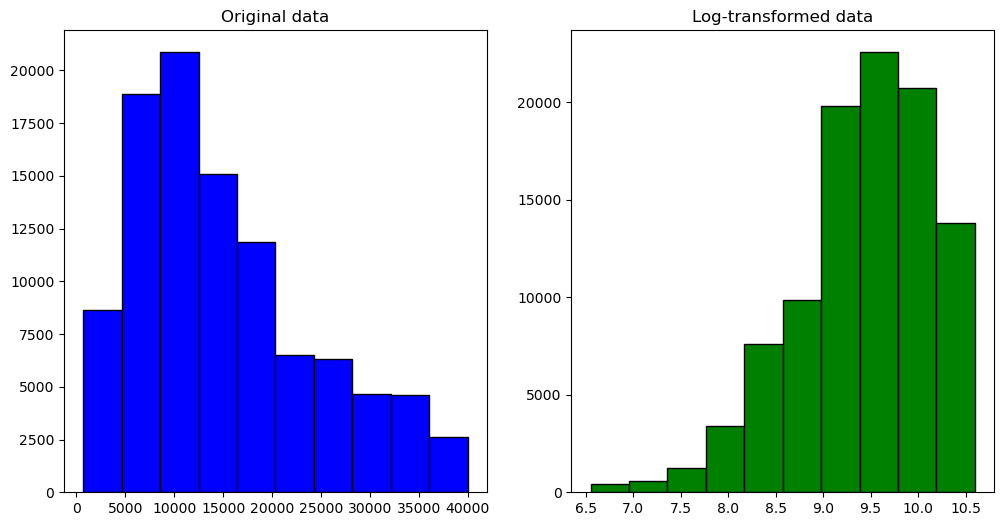

Skewness before log transform: 0.7887250378394999
Skewness after log transform: -0.6505299680118821


In [58]:
import matplotlib.pyplot as plt

# Log transformation
df['loan_amnt_log'] = np.log(df['loan_amnt'] + 1) # Adding +1 to avoid log(0)

# Plotting original and log-transformed data
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.hist(df['loan_amnt'], bins=10, color='blue', edgecolor='black')
plt.title('Original data')

plt.subplot(1, 2, 2)
plt.hist(df['loan_amnt_log'], bins=10, color='green', edgecolor='black')
plt.title('Log-transformed data')

plt.show()

print(f"Skewness before log transform: {skew(df['loan_amnt'])}")
print(f"Skewness after log transform: {skew(df['loan_amnt_log'])}")

## Feature encoding
**Categorical feature encoding** is a crucial step in preparing categorical data for use in machine learning models. Categorical data includes variables that represent discrete categories or groups, such as "loan grade," "employment status," or "credit rating." Unlike numerical data, these categories do not have an inherent order or scale that algorithms can directly interpret. Therefore, we need to convert these categories into a numerical format that can be utilized by machine learning models.

### Dummy Encoding (One-Hot Encoding)

**Dummy Encoding** (or One-Hot Encoding) converts each category of a categorical variable into a new binary column (0 or 1). Each column represents a category, with a value of `1` indicating the presence of that category in the observation, and `0` otherwise.

**Why is this important?**
Machine learning algorithms generally require numerical input. Without converting categorical data into numerical form, algorithms wouldn't be able to process the data, leading to errors.

By using dummy encoding, you preserve the distinct nature of each category without implying any order or rank between them. This is especially important for models like linear regression, where numerical values can suggest a relationship or order that does not actually exist.

In [60]:
# One-hot encoding
df_dummies = pd.get_dummies(df['grade'], prefix='grade')
df_dummies.head()

,grade_A,grade_B,grade_C,grade_D,grade_E,grade_F,grade_G
0,False,True,False,False,False,False,False
1,False,True,False,False,False,False,False
2,False,True,False,False,False,False,False
3,False,True,False,False,False,False,False
4,False,False,True,False,False,False,False


### Label Encoding
Label Encoding assigns a unique integer to each category in the categorical variable. For example, a "loan grade" of 'A' might be encoded as `0`, 'B' as `1`, and so on.

**Why is this important?**: Label encoding is useful when the categorical variable is ordinal (i.e., there is a meaningful order or ranking to the categories). However, for non-ordinal data, it might imply an order that does not exist, potentially misleading the model.
This method is simple and works well when you need to convert a categorical variable with many levels into a numerical format quickly. However, be careful not to unintentionally introduce ordinal relationships when none exist.

In [64]:
from sklearn.preprocessing import LabelEncoder

# Label encoding
le = LabelEncoder()
df['grade_encoded'] = le.fit_transform(df['grade'])
df[['grade', 'grade_encoded']].head()

,grade,grade_encoded
0,B,1
1,B,1
2,B,1
3,B,1
4,C,2


5\. Useful data visualisation techniques
----------------------
### Why is Visualization Important?

Visualization helps in understanding data patterns and communicating findings effectively. Common visualization techniques include:

-   **Histograms**: To visualize distributions
-   **Box Plots**: To identify outliers
-   **Bar Plots**: To compare categories
-   **Pair Plots**: To explore relationships between pairs of variables
-   **Heatmaps**: To visualize correlations
-   **Violin Plots**: To combine density and summary statistics

Check out the [seaborn cheat sheet](https://www.datacamp.com/cheat-sheet/python-seaborn-cheat-sheet) for more info.

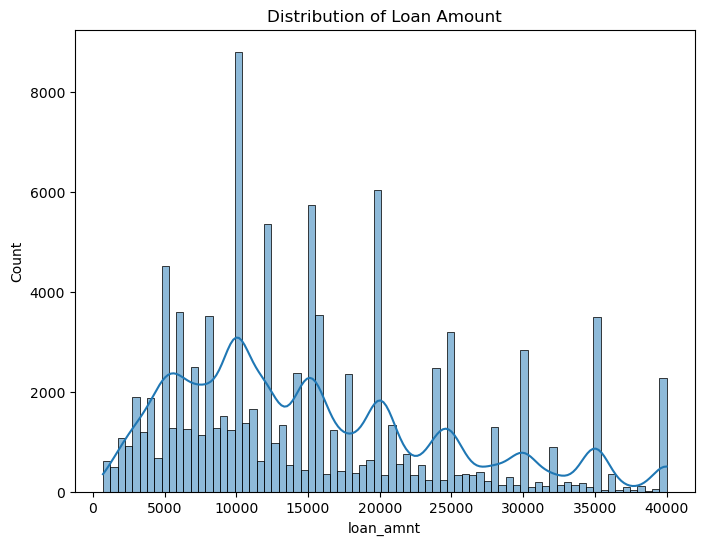

In [66]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histogram of Loan Amount
plt.figure(figsize=(8, 6))
sns.histplot(df['loan_amnt'], kde=True)
plt.title('Distribution of Loan Amount')
plt.show()



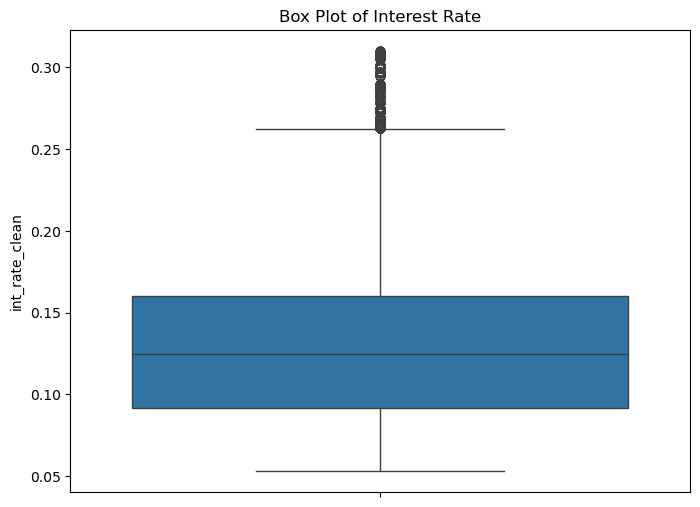

In [67]:
# Box Plot of Interest Rate
plt.figure(figsize=(8, 6))
sns.boxplot(y=df['int_rate_clean'])
plt.title('Box Plot of Interest Rate',)
plt.show()


In [69]:
# Select numeric columns only
df_numeric = df.select_dtypes(exclude="object")


In [70]:
 
# # Heatmap of Correlations
# plt.figure(figsize=(8, 6))
# sns.heatmap(df_numeric.corr(), annot=True, cmap='coolwarm', center=0)
# plt.title('Correlation Heatmap')
# plt.show()

Hard to read? Absolutely, this is because too many columns are selected. Let's try on a subset of columns:

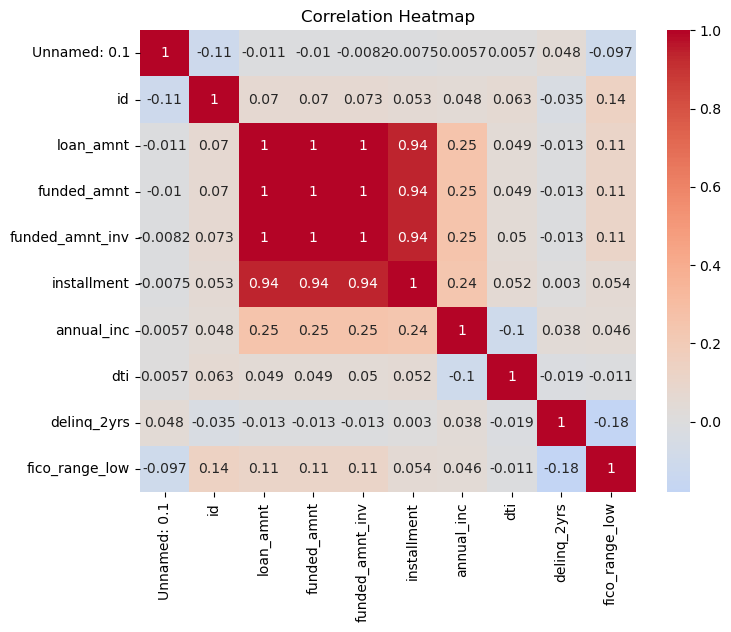

In [76]:
plt.figure(figsize=(8, 6))
sns.heatmap(df_numeric \
            .drop(columns=df_numeric.columns[10:]) \
            .corr(), annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap')
plt.show()

In [77]:
df_numeric.corr().head(2)

,Unnamed: 0.1,id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_bal,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,annual_inc_joint,dti_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_fico_range_low,sec_app_fico_range_high,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,deferral_term,hardship_amount,hardship_length,hardship_dpd,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,last_pymnt_amnt_log,last_pymnt_amnt_capped,int_rate_clean,term_numeric,debt_to_income,loan_amnt_log,grade_encoded
Unnamed: 0.1,1.00,-0.11,-0.01,-0.01,-0.01,-0.01,0.01,0.01,0.05,-0.10,-0.10,-0.01,-0.04,0.05,0.09,0.01,0.05,-0.14,-0.14,0.08,0.09,0.09,0.03,0.03,0.06,0.07,0.05,-0.07,-0.06,0.02,-0.02,NaN,0.00,-0.05,0.03,0.02,-0.00,0.03,0.02,0.01,0.02,-0.00,0.01,0.04,0.03,0.04,-0.01,0.09,-0.02,-0.03,0.01,0.03,0.05,-0.01,-0.05,0.06,0.01,0.01,0.02,0.03,-0.03,-0.03,0.02,-0.01,-0.02,-0.03,-0.03,0.03,0.01,0.03,-0.00,0.02,0.03,0.02,0.04,0.03,0.03,0.01,0.02,0.02,0.05,-0.04,0.05,0.04,0.06,-0.01,0.02,-0.04,0.02,0.03,0.05,0.05,-0.00,0.05,0.01,-0.05,0.00,0.00,-0.03,-0.03,0.11,0.04,0.11,0.20,0.02,0.02,-0.02,0.09,0.06,-0.00,-0.00,-0.00,-0.00,0.06
id,-0.11,1.00,0.07,0.07,0.07,0.05,0.05,0.06,-0.03,0.14,0.14,-0.13,0.04,0.02,-0.05,0.01,-0.07,0.54,0.54,-0.35,-0.35,-0.34,-0.23,-0.02,-0.10,-0.08,-0.14,0.16,0.14,0.01,0.06,NaN,0.13,0.03,-0.03,-0.01,0.03,-0.03,0.01,0.01,0.01,-0.04,0.03,-0.03,-0.05,-0.07,0.05,-0.10,0.11,0.06,0.01,-0.04,-0.00,0.02,0.17,-0.21,-0.00,-0.01,-0.02,-0.05,0.05,0.02,-0.09,0.01,-0.01,0.04,0.02,-0.00,0.00,-0.04,0.04,-0.11,0.01,-0.00,-0.11,-0.04,0.01,-0.01,-0.03,-0.02,-0.00,0.02,-0.20,-0.01,-0.05,0.06,0.06,0.14,0.08,0.09,0.12,0.12,-0.01,0.03,0.01,-0.12,0.02,-0.00,-0.02,-0.04,-0.25,-0.09,-0.25,-0.38,0.21,0.37,0.03,-0.26,-0.18,-0.04,0.02,0.00,0.03,-0.18


In [79]:
# How to use or interpret? 
df_to_iterate = df_numeric.corr()
    
# Iterate through each numeric column in the dataframe
for column in df_to_iterate.columns:
    # Sort the values in descending order and take the top 3
    top_3_values = df_to_iterate[column].nlargest(3)
    print(f"Top 3 values for column '{column}':\n{top_3_values}\n")

Top 3 values for column 'Unnamed: 0.1':
Unnamed: 0.1    1.00
hardship_dpd    0.20
deferral_term   0.11
Name: Unnamed: 0.1, dtype: float64

Top 3 values for column 'id':
id              1.00
out_prncp       0.54
out_prncp_inv   0.54
Name: id, dtype: float64

Top 3 values for column 'loan_amnt':
loan_amnt         1.00
funded_amnt       1.00
funded_amnt_inv   1.00
Name: loan_amnt, dtype: float64

Top 3 values for column 'funded_amnt':
funded_amnt       1.00
loan_amnt         1.00
funded_amnt_inv   1.00
Name: funded_amnt, dtype: float64

Top 3 values for column 'funded_amnt_inv':
funded_amnt_inv   1.00
funded_amnt       1.00
loan_amnt         1.00
Name: funded_amnt_inv, dtype: float64

Top 3 values for column 'installment':
installment   1.00
funded_amnt   0.94
loan_amnt     0.94
Name: installment, dtype: float64

Top 3 values for column 'annual_inc':
annual_inc         1.00
annual_inc_joint   0.72
tot_hi_cred_lim    0.35
Name: annual_inc, dtype: float64

Top 3 values for column 'dti':
dti

Key highlights:
- High correlation (red) is expected across the diagonal (unsurprisingly, features are correlated to themselves..)
- It is important to review features that are correlated and ask ourselves 2 key questions:  
    > a) Do we understand why they are, in other words is it expected?  
    > b) Do we think a feature may carry additional information to the features it shows high correlation with? If so, it may be worth retaining for modelling purposes, *however* we want to minimise the risk of multicollinearity, which poses a problem for some types of models.  

We will be talking about this in our modelling classes, so don't worry too much about it for now.

### <span style="color:BLUE"> **>>>EXERCISE:**  </span>
Looks like there may be some correlation between income and loan amount (expectedly, as higher income individuals are able to afford higher loan amounts).
    
Search the documentation of [seaborn](seaborn.com) and create a pair plot between those 2 features     


In [82]:
# YOUR CODE HERE


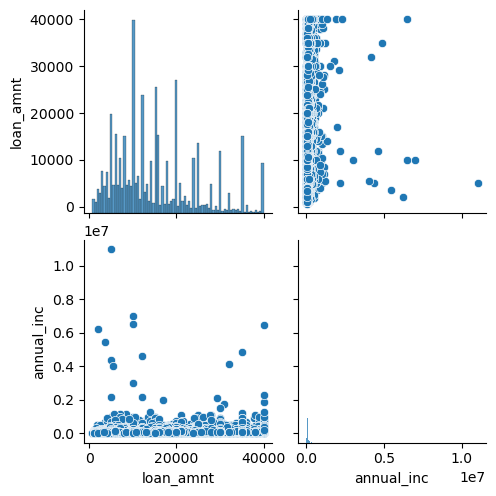

In [83]:
# SOLUTION
# Pair Plot
sns.pairplot(df[['loan_amnt', 'annual_inc']])
plt.show()


6\. Data standardisation & Normalisation
----------------------------------------


### Data standardization
Standardization involves transforming data so that it has a mean of zero and a standard deviation of one. This is particularly important for algorithms that assume data is normally distributed and those that are sensitive to the scale of data, such as:  
1\. **Gradient descent-based Algorithms:** Algorithms like linear regression, logistic regression, and neural networks.  
2\. **Distance-based Algorithms:** Algorithms such as K-nearest neighbors (KNN) and K-means clustering, which rely on distance metrics.

### Data normalization
Normalization scales data to a range of [0, 1] or [-1, 1]. It's crucial for:  
1\. **Ensuring Uniform Contribution:** Each feature contributes equally to the model.  
2\. **Neural Networks:** Where the range of input data can significantly impact the training process.  

Standardization is generally preferred when working with algorithms that assume normally distributed data or when features have different units and you need them to have zero mean and unit variance.  
Normalization is typically used when you need to scale features to a fixed range or when working with algorithms sensitive to the magnitude of input data.  

Let's take a look at the distribution of two numerical features: `loan_amnt` (loan amount) and `annual_inc` (annual income).


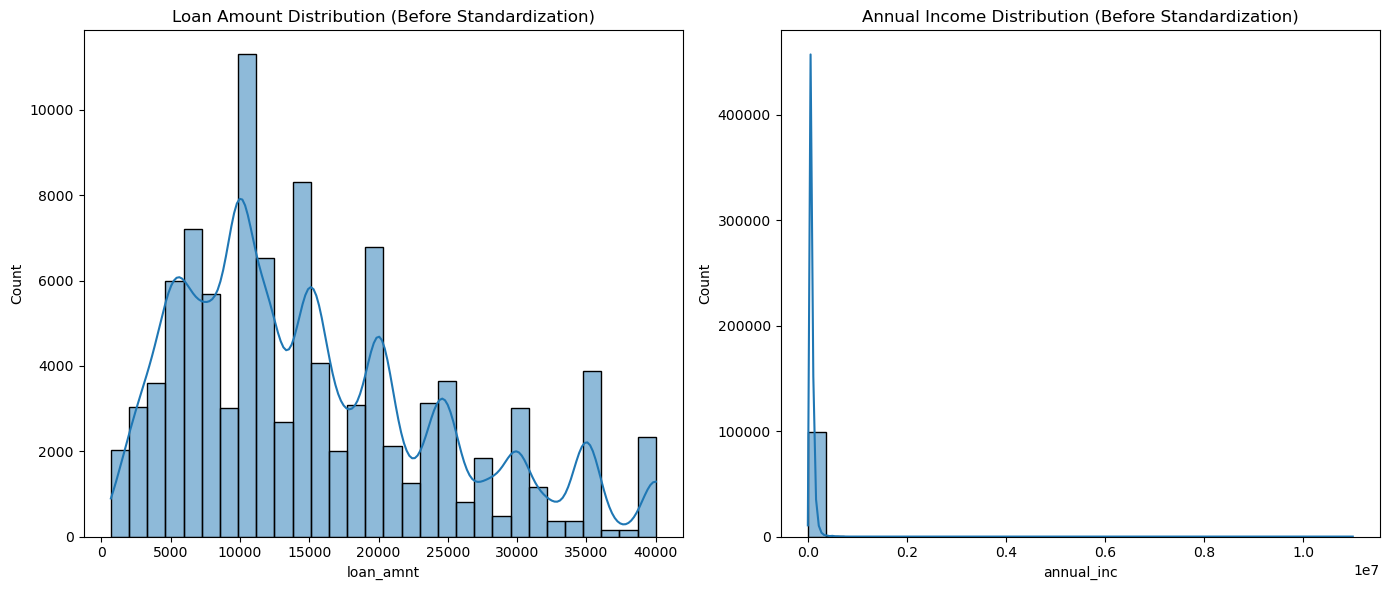

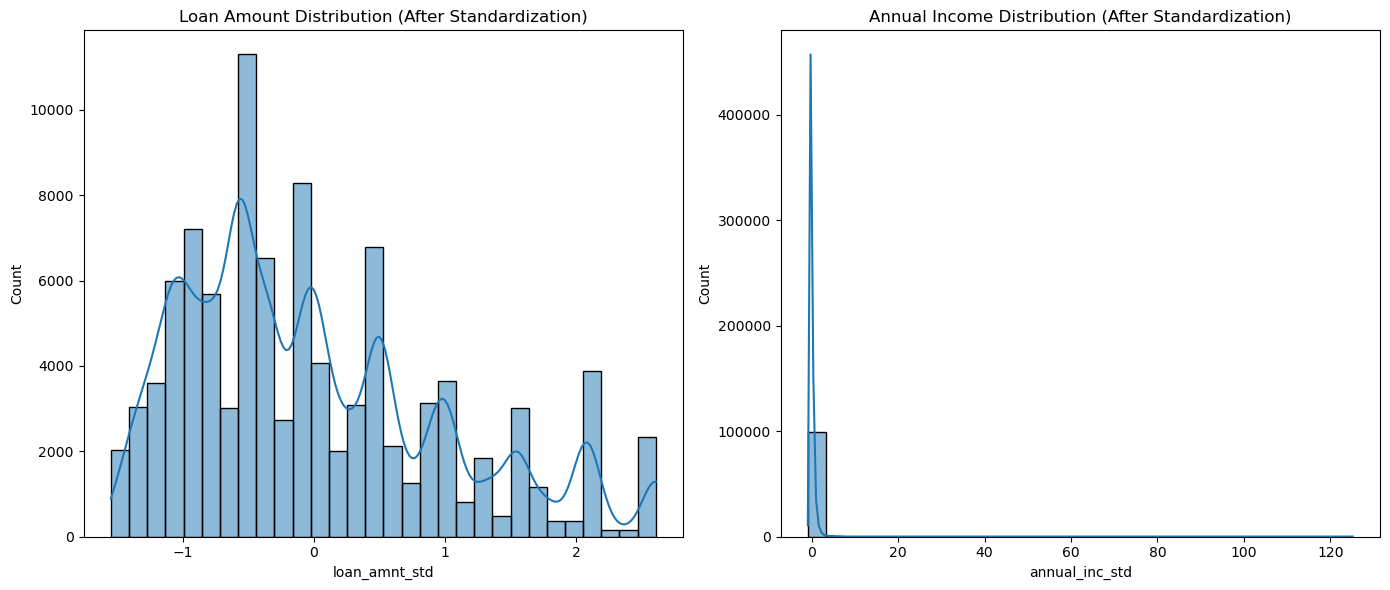

In [87]:
from sklearn.preprocessing import StandardScaler

# Standardizing the data
scaler = StandardScaler()

df[['loan_amnt_std', 'annual_inc_std']] = scaler.fit_transform(df[['loan_amnt', 'annual_inc']])

# Plotting the distributions before standardization
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
sns.histplot(df['loan_amnt'], bins=30, kde=True)
plt.title('Loan Amount Distribution (Before Standardization)')
plt.subplot(1, 2, 2)
sns.histplot(df['annual_inc'], bins=30, kde=True)
plt.title('Annual Income Distribution (Before Standardization)')
plt.tight_layout()
plt.show()


# Plotting the distributions after standardization
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
sns.histplot(df['loan_amnt_std'], bins=30, kde=True)
plt.title('Loan Amount Distribution (After Standardization)')
plt.subplot(1, 2, 2)
sns.histplot(df['annual_inc_std'], bins=30, kde=True)
plt.title('Annual Income Distribution (After Standardization)')
plt.tight_layout()
plt.show()


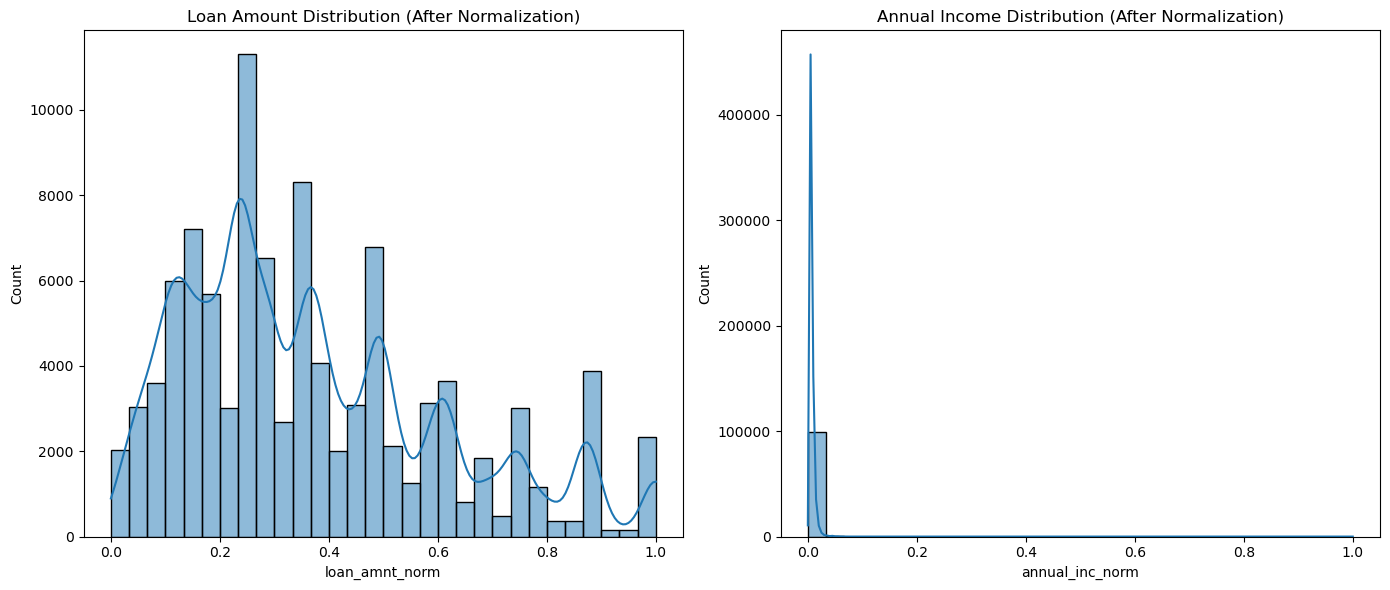

In [88]:
from sklearn.preprocessing import MinMaxScaler

# Normalizing the data
scaler = MinMaxScaler()

df[['loan_amnt_norm', 'annual_inc_norm']] = scaler.fit_transform(df[['loan_amnt', 'annual_inc']])

# Plotting the distributions after normalization
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
sns.histplot(df['loan_amnt_norm'], bins=30, kde=True)
plt.title('Loan Amount Distribution (After Normalization)')
plt.subplot(1, 2, 2)
sns.histplot(df['annual_inc_norm'], bins=30, kde=True)
plt.title('Annual Income Distribution (After Normalization)')
plt.tight_layout()
plt.show()

### Use Cases in Lending

#### Credit Risk Analysis
Standardization and normalization can help improve the accuracy of credit risk models by ensuring that numerical features are on a similar scale, preventing any single feature from disproportionately influencing the model.

#### Fraud Detection
Standardizing and normalizing transaction amounts can help identify anomalies or unusual patterns that may indicate fraudulent activities.


7\. Pandas profiling: a great starting point for EDA
-------------


In [93]:
df.head()

,Unnamed: 0.1,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_fico_range_low,sec_app_fico_range_high,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,debt_settlement_flag,hardship_status_filled,last_pymnt_amnt_log,last_pymnt_amnt_capped,emp_title_clean,emp_title_manager,Job Title,Category,int_rate_clean,term_numeric,debt_to_income,loan_amnt_log,grade_encoded,loan_amnt_std,annual_inc_std,loan_amnt_norm,annual_inc_norm
0,1746494,167338079,4000.00,4000.00,4000.00,36 months,13.08%,134.93,B,B5,cashier,10+ years,MORTGAGE,48000.00,Source Verified,Mar-2020,Current,n,home_improvement,Home improvement,115xx,NY,20.25,1.00,Dec-2004,665.00,669.00,0.00,19.00,4.00,1.00,1988.00,82.8%,12.00,w,3816.34,3816.34,266.95,266.95,183.66,83.29,0.00,0.00,0.00,May-2020,134.93,Jun-2020,May-2020,669.00,665.00,1.00,NaN,1.00,Individual,NaN,NaN,NaN,0.00,3832.00,259024.00,0.00,1.00,0.00,1.00,16.00,9960.00,56.00,0.00,0.00,0.00,59.00,2400.00,1.00,0.00,0.00,1.00,64756.00,NaN,NaN,0.00,0.00,179.00,75.00,38.00,16.00,2.00,NaN,19.00,16.00,19.00,1.00,0.00,2.00,0.00,1.00,5.00,2.00,5.00,2.00,4.00,0.00,0.00,0.00,0.00,75.00,NaN,1.00,0.00,395328.00,11948.00,0.00,17928.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NO_HARDSHIP,4.91,134.93,cashier,False,NaN,NaN,0.13,36.00,0.08,8.29,1,-1.20,-0.37,0.08,0.00
1,2370717,71016917,24000.00,24000.00,24000.00,60 months,9.16%,500.07,B,B2,ABM,6 years,RENT,57000.00,Source Verified,Feb-2016,Current,n,credit_card,Credit card refinancing,708xx,LA,25.33,0.00,Jan-2004,680.00,684.00,0.00,NaN,10.00,0.00,22697.00,64.5%,24.00,w,4333.29,4333.29,25496.16,25496.16,19666.71,5829.45,0.00,0.00,0.00,May-2020,500.07,Jun-2020,May-2020,704.00,700.00,0.00,NaN,1.00,Individual,NaN,NaN,NaN,0.00,0.00,61815.00,0.00,3.00,0.00,3.00,14.00,39118.00,72.00,1.00,1.00,2137.00,67.00,35200.00,0.00,7.00,0.00,4.00,6182.00,7741.00,40.50,0.00,0.00,145.00,137.00,7.00,7.00,0.00,7.00,NaN,24.00,NaN,0.00,3.

In [94]:
# Sampling data for ease of processing (note: make sure the sample size is large enough to extrapolate from)
features = ['term', 'fico_range_high', 'fico_range_low', 'annual_inc', 'dti']
df_sampled = df[features].sample(100)


In [95]:
from ydata_profiling import ProfileReport
report = ProfileReport(df_sampled, title= "Report")
report # Will take a few minutes to process

# report.to_file('../reports/dsif3-data-profiling.html') # To save as html

ModuleNotFoundError: No module named 'ydata_profiling'

## Data export
Before moving to the last section on time series, let's export our data to the "intermediate" data folder.

In [ ]:
df.to_csv(f"{path_python_material}/data/2-intermediate/df_out_dsif3.csv"
                        , index = False)

8\. Assignment #1
-------------

Take your data cleaning and exploratory data analysis further and uncover **at least 2 additional actionable insights** as an outcome of EDA.
Tips:
- Feel free to drop or generate additional features in doing so.
- How can the business leverage the insights uncovered and how can the impact of your insight be measured?

**Submission:** Submit your notebook with the EDA and insights documented.

**Evaluation Criteria:**

-   Depth of analysis and insights derived.
-   Relevance and feasibility of the actionable insights.
-   Clarity and thoroughness of code and explanations.

Tips: don't be afraid to be creative, and go past what was covered in this session (e.g. additional plot types etc.)

Happy exploring!

In [105]:
#### Example structure ####

# 1. Load data 
#    > recommended to use output from above class

# 2. Data cleaning

# 3. Summary statistics

# 4. Feature engineering

# 5. Visualization 
#    > check out seaborn documentation at link above

# 6. Insights and conclusions
#    > what actions is your insight driving 
#    (could be data cleaning action, or a question/hypothesis for the business to test, etc.)

In [108]:
import seaborn as sns
import matplotlib.pyplot as plt

In [112]:
df_dropped = pd.read_csv(rf"{path_python_material}/data/2-intermediate/df_out_dsif2.csv")

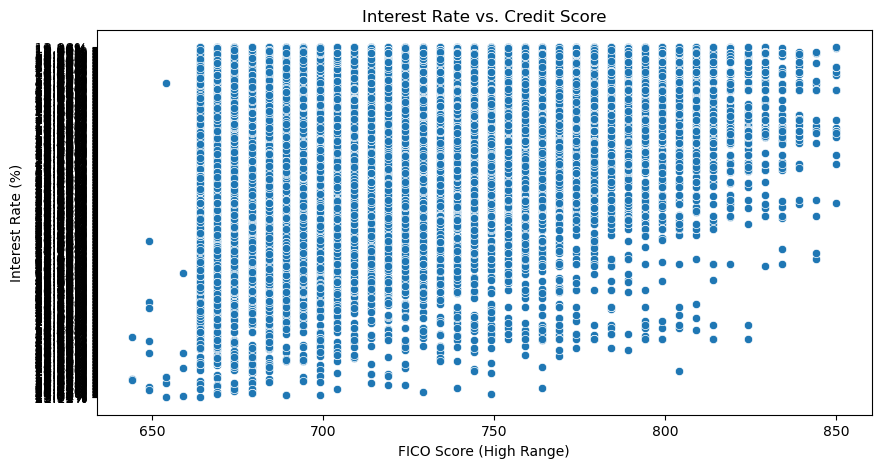

In [114]:
plt.figure(figsize=(10,5))
sns.scatterplot(data=df_dropped, x='fico_range_high', y='int_rate')
plt.title("Interest Rate vs. Credit Score")
plt.xlabel("FICO Score (High Range)")
plt.ylabel("Interest Rate (%)")
plt.show()

In [124]:
# don't need % sign and convert to float
df_dropped["int_rate"] = df_dropped["int_rate"].str.rstrip("%").astype(float)

AttributeError: Can only use .str accessor with string values!

bad results

In [126]:
print(df_dropped["int_rate"].dtype)

float64


In [128]:
df_dropped["int_rate"] = df_dropped["int_rate"].astype(str).str.rstrip("%").astype(float)

In [130]:
print(df_dropped["int_rate"].head())
print(df_dropped["int_rate"].dtype)  # Should be float64

0   13.08
1    9.16
2   10.49
3   11.05
4   13.59
Name: int_rate, dtype: float64
float64


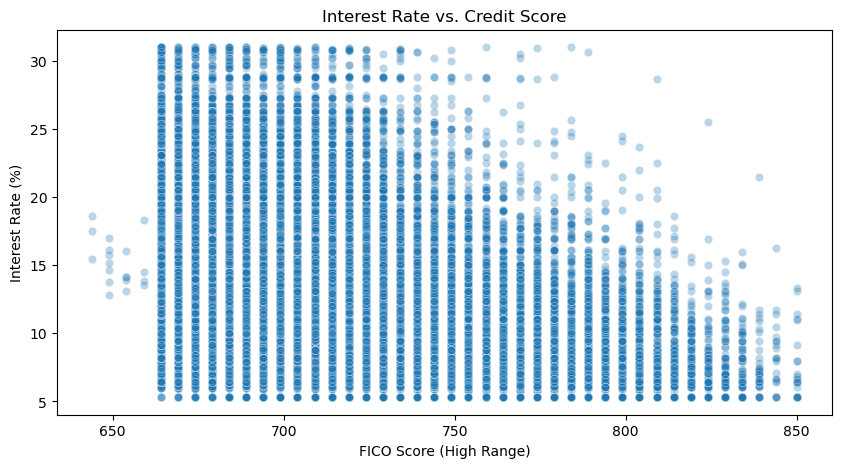

In [132]:
plt.figure(figsize=(10,5))
sns.scatterplot(data=df_dropped, x='fico_range_high', y='int_rate', alpha=0.3)  # Adding transparency
plt.title("Interest Rate vs. Credit Score")
plt.xlabel("FICO Score (High Range)")
plt.ylabel("Interest Rate (%)")
plt.show()

* Key insight is as followsd:
- looks like Higher FICO scores (closer to 850) tend to get lower interest rates.
- Lower FICO scores (below 700) have a much wider spread in interest rates, suggesting higher risk-based pricing.



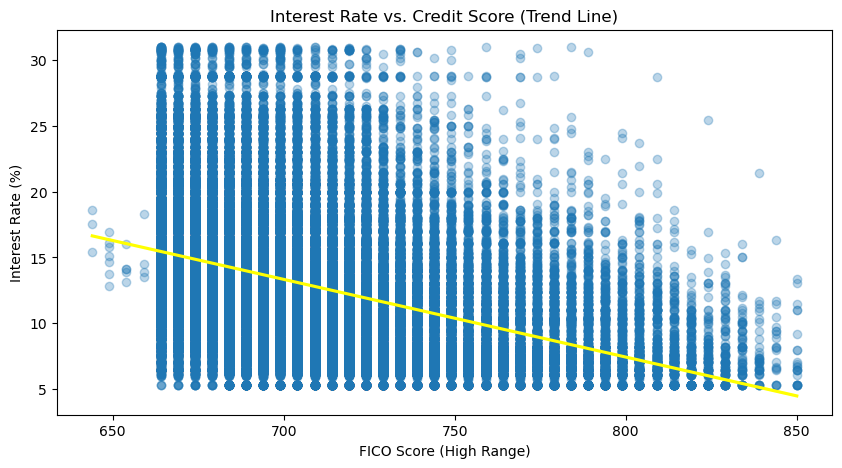

In [139]:
# we can further look for pattern with a trend line
plt.figure(figsize=(10,5))
sns.regplot(data=df_dropped, x='fico_range_high', y='int_rate', scatter_kws={'alpha':0.3}, line_kws={"color": "yellow"})
plt.title("Interest Rate vs. Credit Score (Trend Line)")
plt.xlabel("FICO Score (High Range)")
plt.ylabel("Interest Rate (%)")
plt.show()

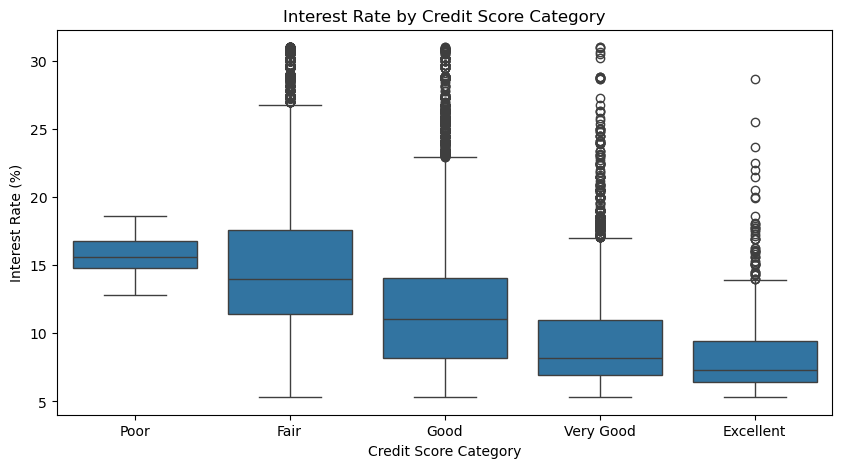

In [143]:
# and now add categories
bins = [300, 650, 700, 750, 800, 850]  # Define some score ranges
labels = ['Poor', 'Fair', 'Good', 'Very Good', 'Excellent']
df_dropped['fico_category'] = pd.cut(df_dropped['fico_range_high'], bins=bins, labels=labels)

plt.figure(figsize=(10,5))
sns.boxplot(data=df_dropped, x='fico_category', y='int_rate')
plt.title("Interest Rate by Credit Score Category")
plt.xlabel("Credit Score Category")
plt.ylabel("Interest Rate (%)")
plt.show()


# Insight 2: 
Higher credit scores strongly correlate with lower interest rates.


Insight 3 development
Exploring Debt-to-Income (DTI) vs. Interest Rate
Debt-to-Income (DTI) ratio is a key factor in loan underwriting, often influencing the interest rate a borrower receives. Lenders assess DTI to measure a borrower's ability to repay debt.

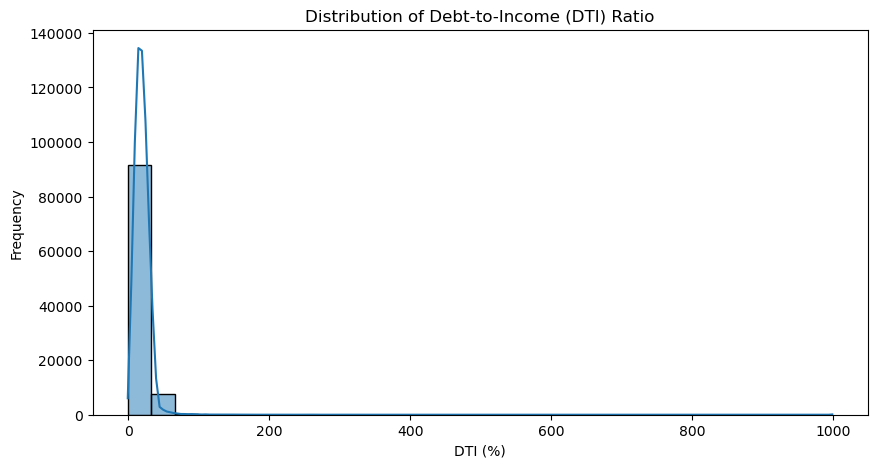

In [148]:
plt.figure(figsize=(10,5))
sns.histplot(df_dropped['dti'], bins=30, kde=True)
plt.title("Distribution of Debt-to-Income (DTI) Ratio")
plt.xlabel("DTI (%)")
plt.ylabel("Frequency")
plt.show()

This distro is highly skewed, extreme outliers. Potential data issue.

In [156]:
print(df_dropped[df_dropped["dti"] > 100].shape)

(0, 148)


In [158]:
# need to remove rows where DTI > 100% to eliminate extremes
df_dropped = df_dropped[df_dropped["dti"] <= 100]


In [160]:
# hypo: should be 176 rows less than before
print(df_dropped.shape) 

(99722, 148)
